In [34]:
import pandas as pd
import numpy as np 
from statistics import mode
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [38]:
df["Item_Weight"].isna().sum()

0

In [39]:
df["Outlet_Size"].value_counts().to_dict()

{'Medium': 2793, 'Small': 2388, 'High': 932}

In [40]:
df["Outlet_Size"].replace({'Medium': 2, 'Small': 1, 'High': 3},inplace=True)

In [41]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)

In [42]:
df["Outlet_Size"].isna().sum()

0

In [43]:
df["Outlet_Size"].astype(int)

0       2
1       2
2       2
3       2
4       3
       ..
8518    3
8519    2
8520    1
8521    2
8522    1
Name: Outlet_Size, Length: 8523, dtype: int32

In [44]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(df[feat],drop_first= True,dtype=int)
df = pd.concat([df,X],axis=1)

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,...,0,0,0,1,0,0,0,0,0,0


In [46]:
df.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [47]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [48]:
df.drop(labels=["Outlet_Establishment_Year"],inplace=True,axis=1)

In [49]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [50]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914,0.654347,0.108882,0.109703,0.326763,0.393054,0.597090,...,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365
std,4.226124,0.051598,62.275067,1706.499616,0.475609,0.311509,0.312538,0.469057,0.488457,0.490512,...,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634
min,4.555000,0.000000,31.290000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.026989,93.826500,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.053931,143.012800,1794.331000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,0.094585,185.643700,3101.296400,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,13086.964800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
x = df.drop(labels=["Item_Outlet_Sales"],axis=1)
y = df["Item_Outlet_Sales"]

In [52]:
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()

In [53]:
scaled_x = scalar.fit_transform(x)

In [56]:
x=pd.DataFrame(scaled_x,columns = x.columns)
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0.282525,0.048866,0.927507,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = LR_model.predict(x_test)

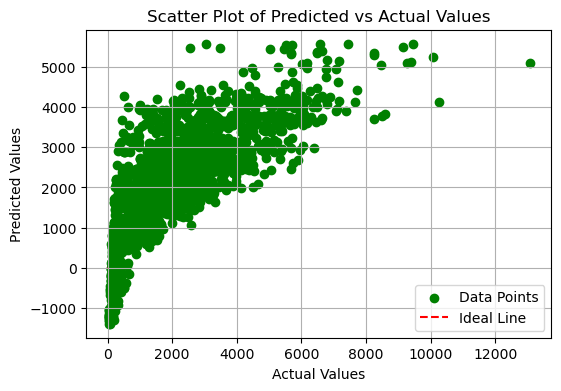

In [60]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green', label='Data Points')

# Plot the diagonal line
plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Ideal Line')

plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

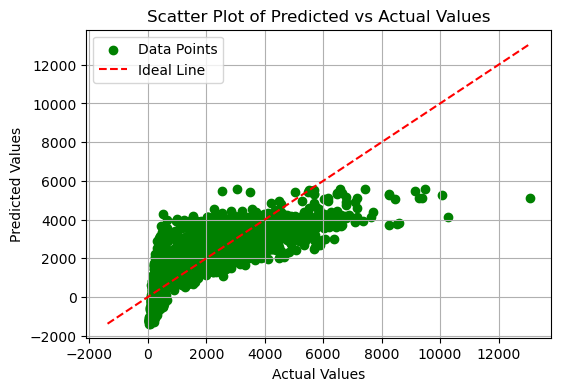

In [61]:
import matplotlib.pyplot as plt
import numpy as np
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green', label='Data Points')

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


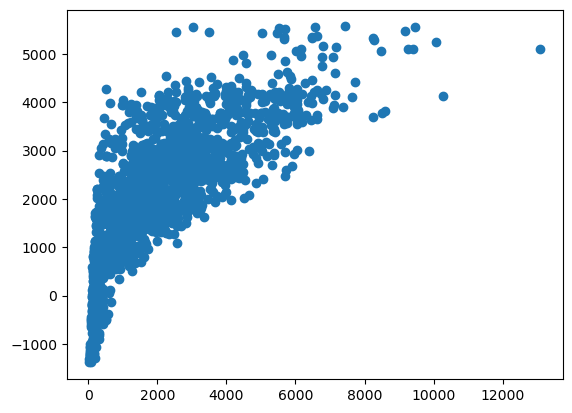

In [62]:
plt.scatter(y_test, y_pred)
plt.show()

In [63]:
linear_mse = mean_squared_error(y_test,y_pred)
linear_mse

1266841.6672398916

In [64]:
linear_mae = mean_absolute_error(y_test,y_pred)
linear_mae

829.8164513224867

In [65]:
linear_rmse = root_mean_squared_error(y_test,y_pred)
linear_rmse

1125.5406111020125

In [66]:
linear_r2 = r2_score(y_test,y_pred)
linear_r2

0.5732257674432935

In [71]:

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,cv=5)

grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model

In [60]:
y_pred_rf = best_rf_model.predict(x_train)

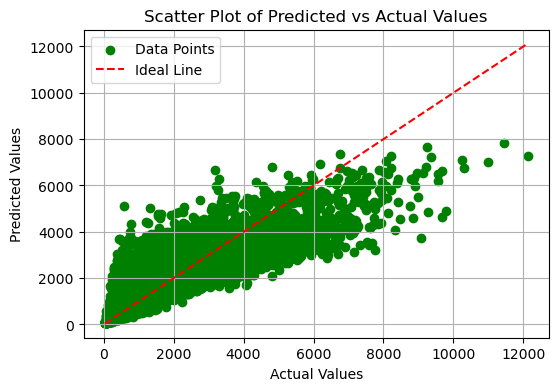

In [61]:
import matplotlib.pyplot as plt
import numpy as np
min_val = min(np.min(y_train), np.min(y_pred_rf))
max_val = max(np.max(y_train), np.max(y_pred_rf))

plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_pred_rf, color='green', label='Data Points')

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
mse = mean_squared_error(y_train,y_pred_rf)
mse

860056.8691035593

In [63]:
mae = mean_absolute_error(y_train,y_pred_rf)
mae

646.9484985622379

In [64]:
y_test_pred_rf = best_rf_model.predict(x_test)

In [65]:
mae = mean_absolute_error(y_test,y_test_pred_rf)
mae

764.705010748869

In [66]:
r2 = r2_score(y_test,y_test_pred_rf)
r2

0.5994438935579313

In [67]:
r2 = r2_score(y_train,y_pred_rf)
r2

0.7031688797947694

In [68]:
pickle.dump(best_rf_model,open("RF_model.pkl","wb"))

In [40]:
import pickle

with open('RF_model.pkl', 'rb') as file:
    RF_model = pickle.load(file)


In [41]:

print(f'Number of features: {RF_model.n_features_in_}')



Number of features: 27


In [42]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler = StandardScaler()

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [33]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
5470,0.681453,0.198936,0.200377,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8431,0.901756,0.162400,0.108248,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3557,0.184579,0.097474,0.364855,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7918,0.633820,0.102473,0.329804,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4573,0.461149,0.176941,0.123796,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
project_data = {
    "columns":list(x_train.columns)}
project_data

{'columns': ['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Type_Supermarket Type1',
  'Outlet_Type_Supermarket Type2',
  'Outlet_Type_Supermarket Type3',
  'Outlet_Location_Type_Tier 2',
  'Outlet_Location_Type_Tier 3',
  'Item_Fat_Content_Low Fat',
  'Item_Fat_Content_Regular',
  'Item_Fat_Content_low fat',
  'Item_Fat_Content_reg',
  'Item_Type_Breads',
  'Item_Type_Breakfast',
  'Item_Type_Canned',
  'Item_Type_Dairy',
  'Item_Type_Frozen Foods',
  'Item_Type_Fruits and Vegetables',
  'Item_Type_Hard Drinks',
  'Item_Type_Health and Hygiene',
  'Item_Type_Household',
  'Item_Type_Meat',
  'Item_Type_Others',
  'Item_Type_Seafood',
  'Item_Type_Snack Foods',
  'Item_Type_Soft Drinks',
  'Item_Type_Starchy Foods']}

In [70]:
import json
with open("project_data.json","w") as file:
    json.dump(project_data,file)